EXTRACT

Import libraries 

In [149]:
import json 
import requests # HTTP library for makinng http request in python
import pandas as pd # Data manipulation and analysis library
from datetime import datetime # For handling date and time
from matplotlib import pyplot as plt # For plotting graphs
import seaborn as sns # For statistical data visualization


Get the data from the API

In [150]:
api_k =  "20aaf1c9a21207916b5875a80ef6f7e3"
city = "Indore, IN"
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_k}&units=metric"

response = requests.get(url) # Making a GET request to the API
# data = response.json() # Parsing the JSON response

# print("City:", data["name"]) #OUTPUT: City: Indore
# print("Temperature:", data["main"]["temp"], "°C")  #OUTPUT: Temperature: 29 °C
# print("Weather:", data["weather"][0]["description"]) #OUTPUT: Weather: scattered clouds
# print("Coordinates:", data["coord"]["lat"], data["coord"]["lon"]) #OUTPUT: Coordinates: 22.7179 75.8333
# print("TimeZone", data["timezone"]) #OUTPUT: TimeZone 19800

# json_str = json.dumps(data, indent=4) # Convert JSON data to a formatted string
# print(json_str) # Print the formatted JSON string
# Above two lines output:
# {
#     "coord": {
#         "lon": 75.8333,
#         "lat": 22.7179
#     },
#     "weather": [
#         {
#             "id": 802,
#             "main": "Clouds",
#             "description": "scattered clouds",
#             "icon": "03d"
#         }
#     ],
#     "base": "stations",
#     "main": {
#         "temp": 29,
#         "feels_like": 33.3,
#         "temp_min": 29,
#         "temp_max": 29,
#         "pressure": 1004,
#         "humidity": 73,
#         "sea_level": 1004,
#         "grnd_level": 940
#     },
#     "visibility": 10000,
# ...
#     "id": 1269743,
#     "name": "Indore",
#     "cod": 200
# }

# BUT THIS CANT BE USED FOR ANY ANALYSIS SO WE NEED TO CONVERT IT IN TABLE


TRANSFROM

Converting data into table

In [151]:
if response.status_code == 200: # Check if the request was successful
    data = response.json() # Parsing the JSON response
    weather_data = []
    for hour in data['list']: #The forecast API returns a key 'list' containing hourly weather data (every 3 hours). Why: We want to extract data for each timestamp separately.
        date_time = datetime.fromtimestamp(hour['dt']).strftime('%Y-%m-%d %H:%M:%S') # Convert timestamp to datetime
        feels_like = hour['main']['feels_like'] if 'feels_like' in hour['main'] else None
        pressure = hour['main']['pressure'] if 'pressure' in hour['main'] else None
        humidity = hour['main']['humidity'] if 'humidity' in hour['main'] else None
        wind_speed = hour['wind']['speed'] if 'speed' in hour['wind'] else None
        wind_dir = hour['wind']['deg'] if 'deg' in hour['wind'] else None
        cloudiness = hour['clouds']['all'] if 'clouds' in hour else None
        rain_vol = hour.get('rain', {}).get('3h', 0) # Rain volume in last 3 hours
        snow_vol = hour.get('snow', {}).get('3h', 0) # Snow volume in last 3 hours

        # We use conditional checks (if key in dict) or .get() to avoid KeyErrors if some data is missing.
        # rain_vol and snow_vol use .get('3h', 0) → if no rain/snow, default to 0.
        # Why: Weather APIs sometimes don’t include keys if there’s no rain/snow, so this ensures consistent data.

        weather_data.append({
            "date_time": date_time,
            "temperature": hour['main']['temp'],
            "feels_like": feels_like,
            "pressure": pressure,
            "humidity": humidity,
            "wind_speed": wind_speed,
            "wind_dir": wind_dir,
            "cloudiness": cloudiness,
            "rain_vol": rain_vol,
            "snow_vol": snow_vol
        })

    df = pd.DataFrame(weather_data) # converting list of dicts to DataFrame
else:
    print(f"Error: {response.status_code} - {response.reason}") # Handling API errors

# df.head() # Display the first few rows of the DataFrame


In [152]:
pd.set_option('display.max_rows', None)  # Show all rows
df # we have 39 rows 


,date_time,temperature,feels_like,pressure,humidity,wind_speed,wind_dir,cloudiness,rain_vol,snow_vol
0,2025-08-15 17:30:00,24.10,24.86,1002,88,0.96,39,75,5.29,0
1,2025-08-15 20:30:00,25.03,25.83,1002,86,0.95,5,83,12.31,0
2,2025-08-15 23:30:00,24.46,25.26,1002,88,2.02,291,92,2.17,0
3,2025-08-16 02:30:00,24.43,25.25,1001,89,2.40,278,100,2.53,0
4,2025-08-16 05:30:00,23.55,24.39,1001,93,3.57,302,100,1.77,0
5,2025-08-16 08:30:00,24.52,25.48,1003,94,5.44,314,98,1.41,0
6,2025-08-16 11:30:00,26.73,29.39,1002,83,3.65,323,99,0.87,0
7,2025-08-16 14:30:00,27.06,29.97,1000,81,3.19,321,100,1.05,0
8,2025-08-16 17:30:00,26.21,26.21,999,86,2.24,316,100,5.59,0
9,2025-08-16 20:30:00,24.07,24.91,1001,91,2.78,259,100,3.87,0


In [153]:
# We did not convert datetime from object to datetime, so in graph on x-axis it shows data with date and time at all points of data
# We need to convert the 'date_time' column to datetime objects for better plotting
df['date_time'] = pd.to_datetime(df['date_time']) # Convert to datetime. When you pull data from API datetime col is just string, without this converion x labels will be cluttered with repeted string timestamps

# Extract day and hour from datetime
df['Day'] = df['date_time'].dt.date # Extract day
df['Hour'] = df['date_time'].dt.hour # Extract hour

# Pivot the dataframe
df_pivot = df.pivot(index='Day', columns='Hour', values='temperature')
# df_pivot is pivot table we created from original dataframe to restructure temp data to make heatmap
# This reshaped the table:
# rows = each day
# columns = each hour
# values = temperature

In [154]:
average_temp = df['temperature'].mean() # Calculate average temperature

Line Graph 

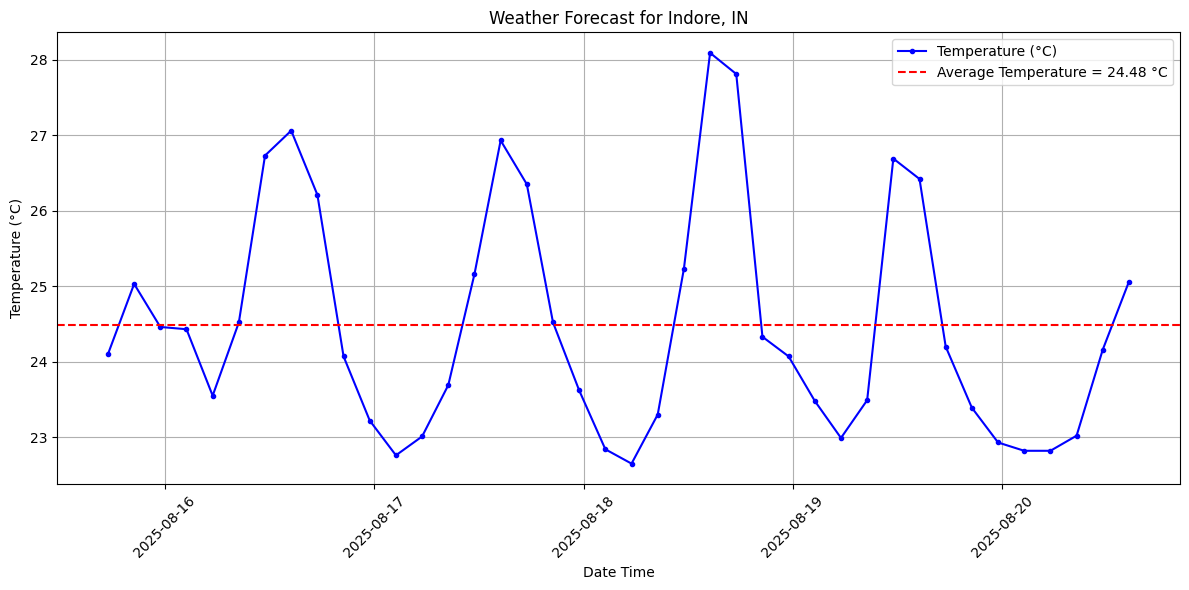

In [155]:
plt.figure(figsize=(12, 6)) # Set the figure size for the plot
plt.plot(df['date_time'], df['temperature'], marker='.',linestyle='-', color='b', label='Temperature (°C)')
plt.axhline(y=average_temp, color='r', linestyle='--', label=f'Average Temperature = {average_temp:.2f} °C')
# axhline draws a horizontal line across the axis
plt.title(f"Weather Forecast for {city}")
plt.xlabel("Date Time")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


Heatmap

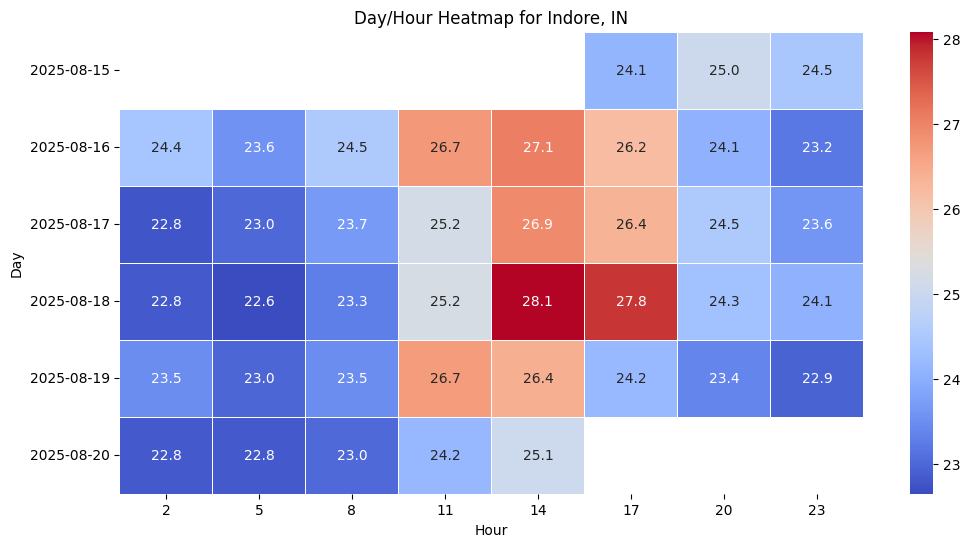

In [156]:
plt.figure(figsize=(12, 6)) # Set the figure size for the plot
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
#  annot = True show temperature value inside the heatmap cells
#  fmt = ".1f" formats the temperature value to one decimal place
plt.title(f"Day/Hour Heatmap for {city}")
plt.xlabel("Hour")
plt.ylabel("Day")
plt.show()

To keep it up-to-date we need to automate data pipeline, that what we call orchestration and scheduling 

We can make it run at whatever time and frequency we want 

LOAD
Loading Data to PostgreSQL database we created: weather_db

right now if we open pgAdmin, we will see nothing under Server -> postgresql-> databases-> weather_db -> Schemas -> public -> Tables
as we did not load our table yet

In [157]:
import psycopg2 # PostgreSQL database adapter for Python
from sqlalchemy import create_engine # sqlalchemy is SQL toolkit and Object-Relational Mapping (ORM) system for Python
# create_engine is used to create a new SQLAlchemy engine instance, to manage db and reuse db connections

In [158]:
# Database Credentials
host="localhost"
database="weather_db"  
user="postgres"        
password="160204"  
port=5432

In [159]:
# Establish a connection using SQLAlchemy engine
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')

In [160]:
# Create a table name
table_name = "weather_data"

# Load data into table
df.to_sql(table_name, engine, if_exists = 'replace', index = False)

# Close engine connection
engine.dispose()

Now we can see our data table in weather_db